In [1]:
import igraph as ig
import os
import numpy as np
import pandas as pd
from string import ascii_uppercase as ASCII

In [2]:
df = pd.read_csv('sociogram-employees-un.csv', encoding='utf-8', header=None)
adj = df.values.tolist()

In [116]:
g = ig.Graph.Adjacency(adj, mode=ig.ADJ_DIRECTED)
for i,v in enumerate(g.vs):
    v["name"] = ASCII[i]
    v["color"] = "yellow"
    v["shape"] = "circle"

for i,e in enumerate(g.es):
    e["color"] = "grey"
    e["arrow_size"] = 0.2

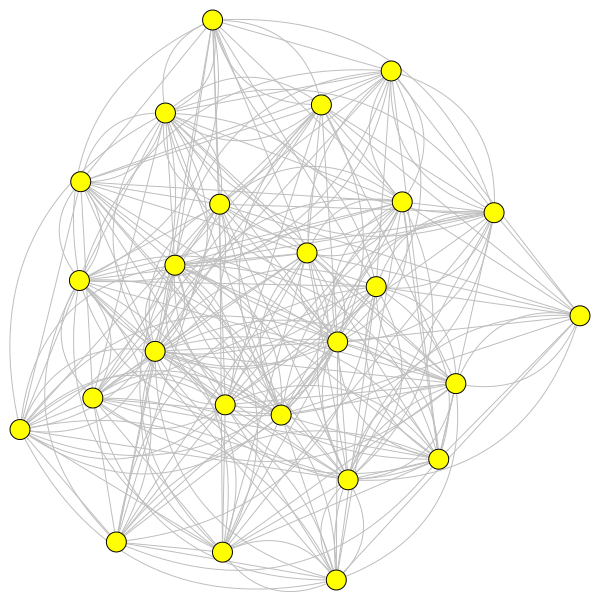

In [42]:
ig.plot(g)

In [50]:
# Calculate network's diameter and avg closeness
print("""Diameter: {}""".format(g.diameter()))
print("""Avg closeness: {}""".format(np.mean(g.closeness())))

Diameter: 3
Avg closeness: 0.7737530806707017


In [51]:
# Betweeness
print("""Avg betweenness: {}""".format(np.mean(g.betweenness())))

Avg betweenness: 13.04


In [52]:
# Density and avg degree
print("""Density: {}""".format(g.density()))
print("""Avg degree: {}""".format(np.mean(g.degree())))

Density: 0.46166666666666667
Avg degree: 22.16


In [53]:
# Reciprocity and avg transitivity
# Density and avg degree
print("""Reciprocity: {}""".format(g.reciprocity()))
print("""Avg transitivity: {}""".format(g.transitivity_avglocal_undirected()))

Reciprocity: 0.48375451263537905
Avg transitivity: 0.718530402174365


In [54]:
print("""Average eccentricity:""")
sum(g.eccentricity())/len(g.vs)

Average eccentricity:


2.04

In [57]:
# hubs
hubs = g.hub_score(scale=False)
hubs

[0.2678092993474583,
 0.20023033123672546,
 0.18716524490157332,
 0.19606503338899522,
 0.20312695686022247,
 0.2414094688388279,
 0.20483749555611258,
 0.2236880762322418,
 0.17265231025006725,
 0.2328843643160094,
 0.23385990272667603,
 0.18815624134302894,
 0.20342270872559753,
 0.1686011862413456,
 0.16993578877952584,
 0.1967460103340367,
 0.17973768309864882,
 0.19825841928856058,
 0.142292008011774,
 0.16165749243972044,
 0.20015830170361806,
 0.20465601032655562,
 0.20912771218168175,
 0.13583257736524873,
 0.22253945908850936]

In [62]:
idx = np.argmax(hubs)
print("""The largest hub is employee #{}, with a score of {}""".format(idx+1, hubs[idx]))

The largest hub is employee #1, with a score of 0.2678092993474583


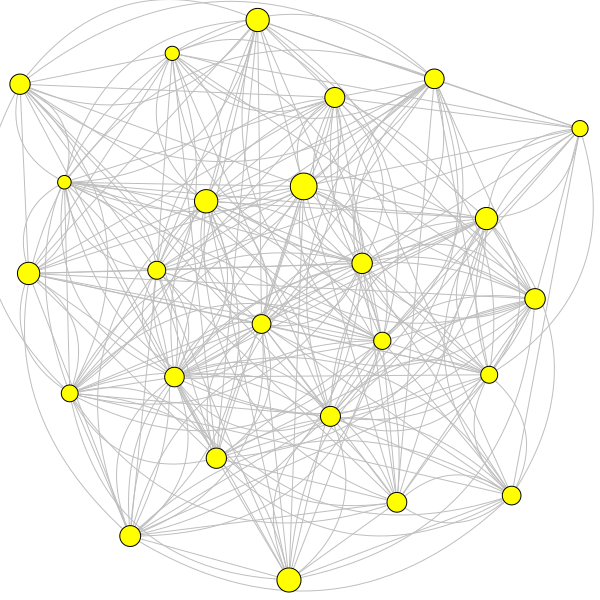

In [63]:
for i,v in enumerate(g.vs):
    v["size"] = 100*hubs[i]
    
ig.plot(g)

In [60]:
# authorities
auths = g.authority_score(scale=False)
auths

[0.14165236537890163,
 0.23262148916415903,
 0.16724379422049718,
 0.3427738930003503,
 0.13525671205275902,
 0.0652632550556973,
 0.1927399743717339,
 0.11196983455623533,
 0.25872570486110114,
 0.0912001642358391,
 0.23543580466563294,
 0.25255663336241546,
 0.09729197907147538,
 0.255441147366792,
 0.18826659943526872,
 0.16817249107273555,
 0.22064436343758406,
 0.1749322371057418,
 0.20450277686523305,
 0.08680452521947762,
 0.144867294902179,
 0.3051450643817399,
 0.18095177111865296,
 0.2760133878956486,
 0.15341335869707518]

In [64]:
idx = np.argmax(auths)
print("""The largest authority is employee #{}, with a score of {}""".format(idx, auths[idx]))

The largest authority is employee #3, with a score of 0.3427738930003503


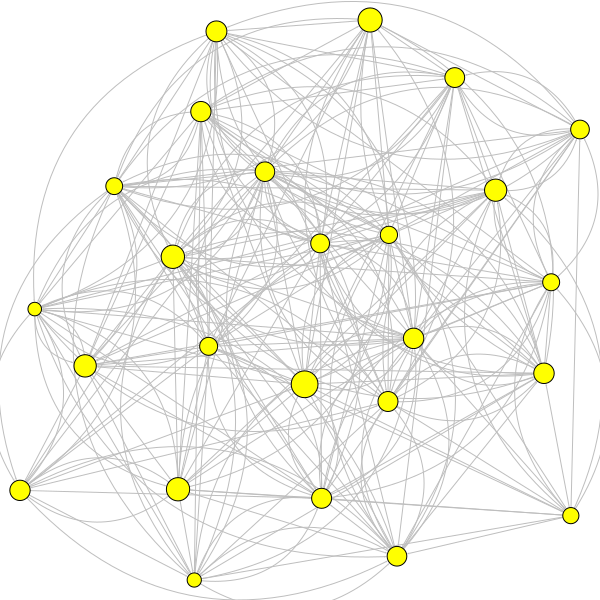

In [65]:
for i,v in enumerate(g.vs):
    v["size"] = 100*hubs[i]
    
ig.plot(g)

In [68]:
# find nodes comprising the diameter
# find the longest shortest-path
diam = g.get_diameter()
diam

[18, 1, 0, 19]

In [117]:
edges = [e.index for e in g.es for i in range(len(diam)-1) if e.tuple == (diam[i], diam[i+1])]  
g.es[edges]["color"] = "red"
g.es[edges]["width"] = 2
g.vs[diam]["color"] = "red"

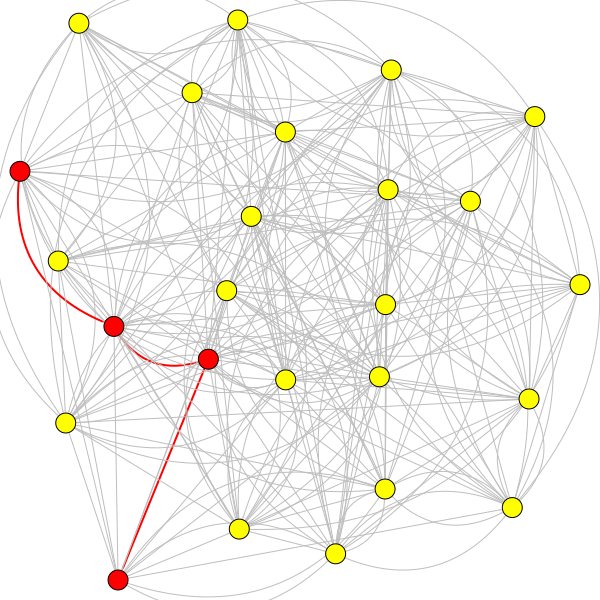

In [118]:
ig.plot(g)

In [123]:
ug = ig.Graph.Adjacency(adj, mode=ig.ADJ_UNDIRECTED)
for i,v in enumerate(ug.vs):
    v["name"] = ASCII[i]
    v["color"] = "yellow"
    v["shape"] = "circle"

for i,e in enumerate(ug.es):
    e["color"] = "grey"

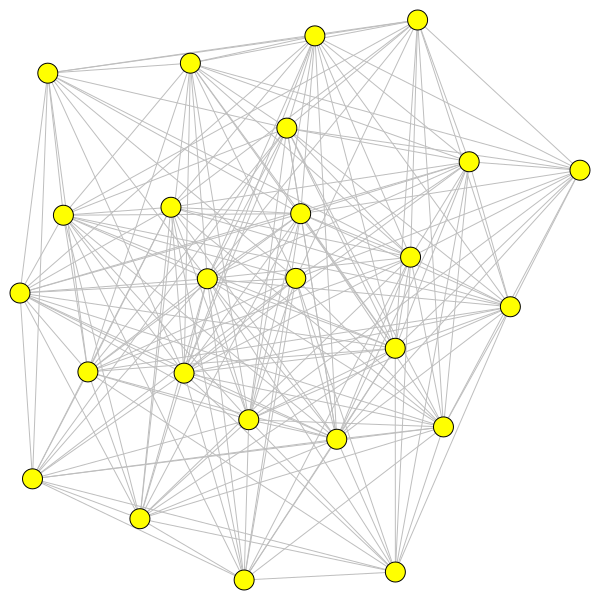

In [124]:
ig.plot(ug)

In [176]:
# find the larges clique in the graph
largest = sorted(ug.cliques(), key=lambda c: -len(c))[0]
print("""The largest clique has length {}""".format(len(largest)))
largest

The largest clique has length 10


(0, 1, 3, 7, 8, 9, 10, 16, 21, 23)

In [130]:
# how many maximal cliques are there?
max_cliques_no = len(ug.cliques(min=len(largest), max=len(largest)))
print("""The number of maximal cliques is {}""".format(max_cliques_no))

The number of maximal cliques is 1


In [133]:
# calculate the network cohesion
coh = ug.cohesion()
print("""The network cohesion is {}""".format(coh))

The network cohesion is 13


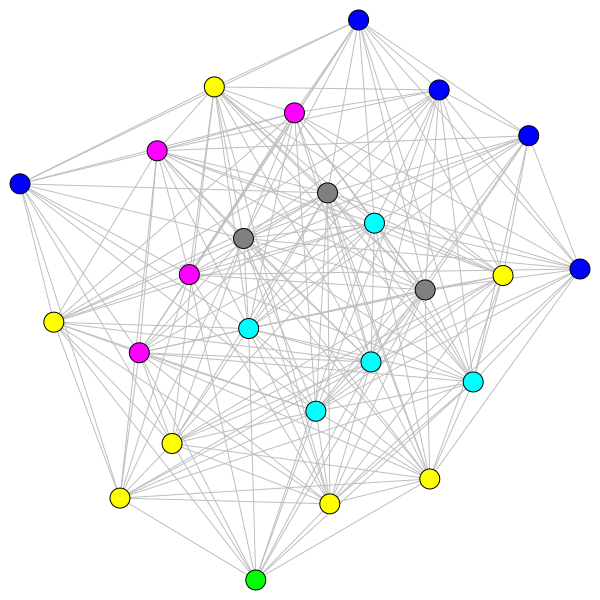

In [153]:
from igraph.clustering import VertexClustering

bwns = np.round(ug.betweenness()).astype(int)
cl = VertexClustering(ug, membership=bwns)

ig.plot(cl)

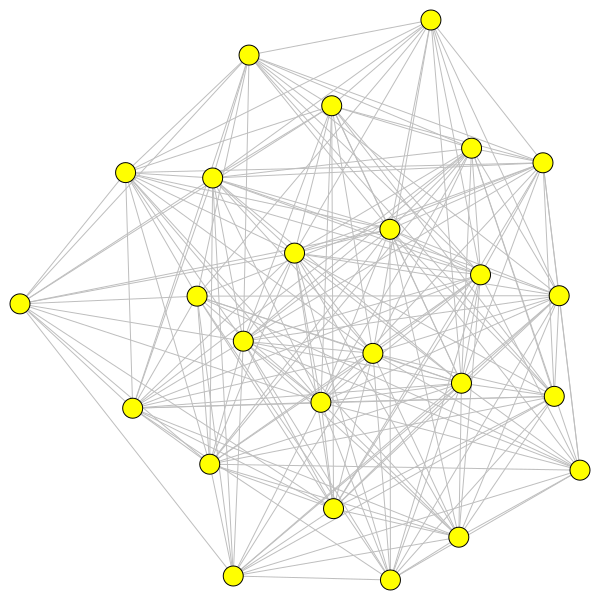

In [155]:
# find the components of the graph
comp = ug.components()
ig.plot(comp)

In [232]:
# find the loop edges
ug.is_loop() # this does not really seem to work...

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [175]:
# find the triangles (i.e. cliques of length 3). How many contains node S?
triangles = ug.cliques(min=3, max=3)
print("""The graph contains {} triangles""".format(len(triangles)))

s_triangles = [path for path in triangles if "S" in ug.vs[path]["name"]]
print("""The graph contains {} triangles involving node S""".format(len(s_triangles)))

The graph contains 807 triangles
The graph contains 63 triangles involving node S


In [174]:
# what is the global clustering coefficient for this network?
cl_coeff = ug.transitivity_undirected()
print("""The global clustering coefficient is {}""".format(cl_coeff))

0.7145808736717828

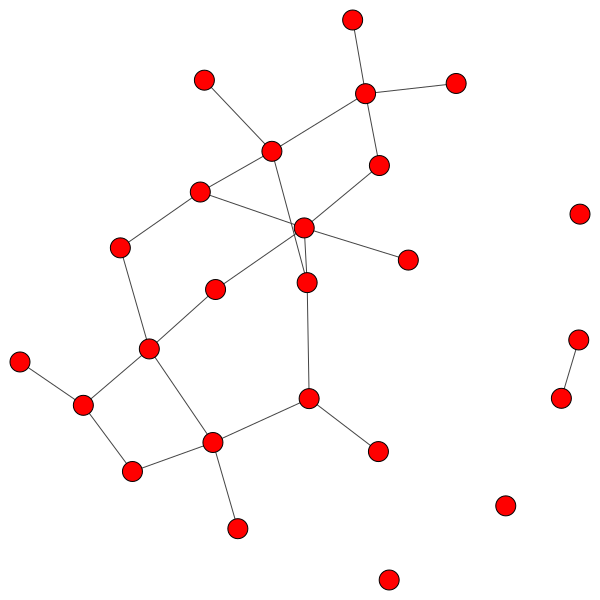

In [181]:
# can we say that clustering is statistically significant for this network?
# let's build a random network with the same #edges and #vertices
rg = ig.Graph.Erdos_Renyi(n=len(ug.vs), m=len(ug.vs))
ig.plot(rg)

In [180]:
print("""The global clustering coefficient for the random graph is {}""".format(rg.transitivity_undirected()))

The global clustering coefficient for the random graph is 0.22641509433962265


Compared with a random network, the coefficient appears quite larger, being more than triple the value. However, a more precise analysis would require us to know the distribution of such coefficient so that we could provide a confidence for the probability of this difference to be statistically significant.

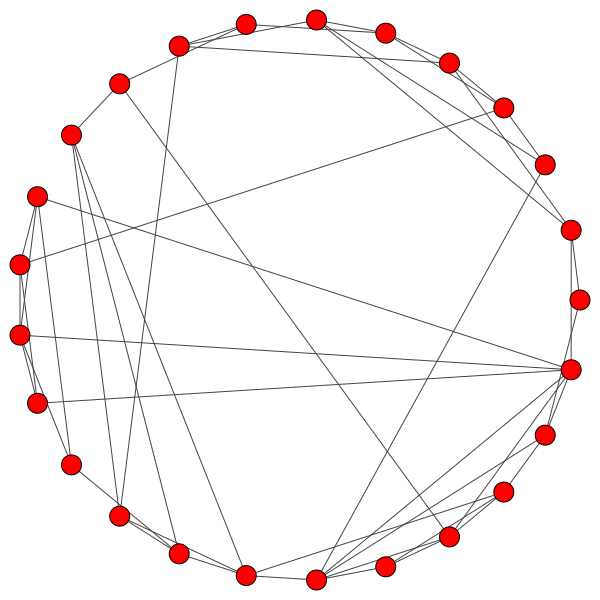

In [230]:
small_world = ig.Graph.Watts_Strogatz(dim=1, size=len(ug.vs), nei=2, p=0.2)
ig.plot(small_world, layout='circle')

In [229]:
print("""Clustering coefficient for the small world network: {}""".format(small_world.transitivity_undirected()))

Clustering coefficient for the small world network: 0.15606936416184972
